In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [2]:
ls *.csv

Chla_Insitu_PACE.csv  RRS_PACE_Sorad_matchups.csv  RRS_SVC.csv
RRS_PACE.csv          RRS_Sorad.csv                TSM_Insitu_PACE_Nechad.csv


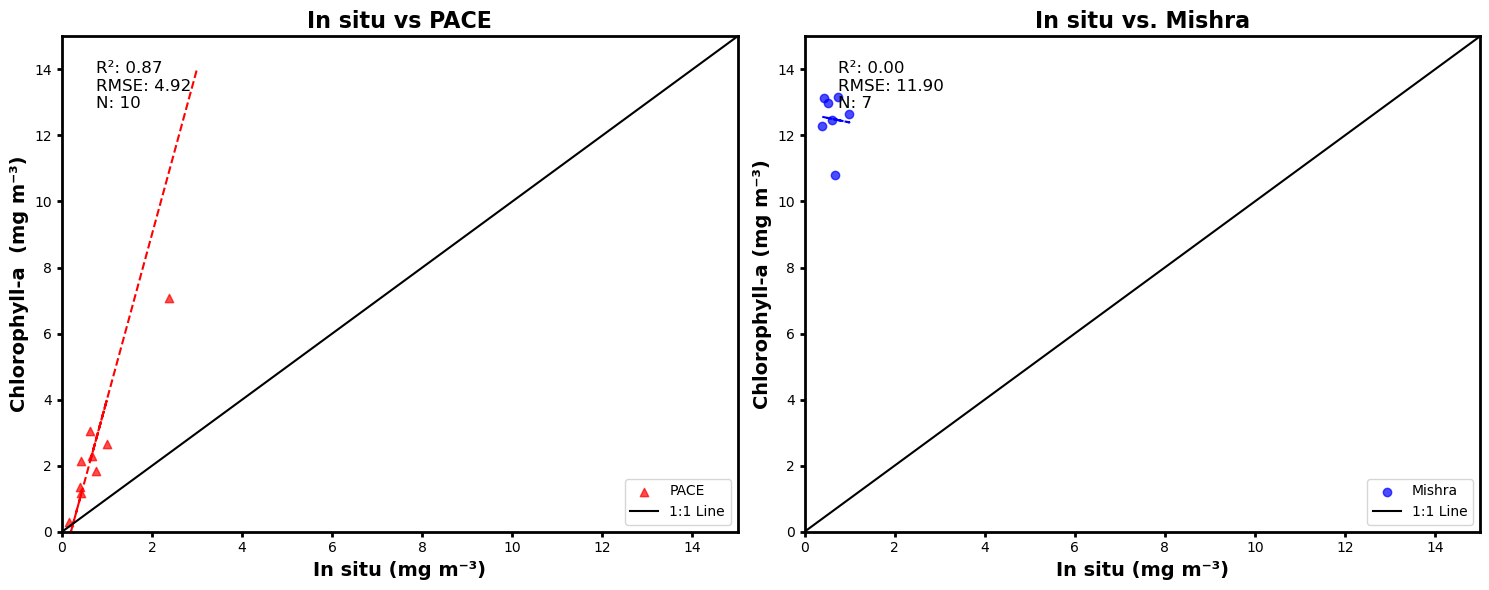

In [15]:

# Load the CSV file
df = pd.read_csv('Chla_Insitu_PACE.csv')

# Remove rows with NaN values in columns 4, 5, and 6 (InSitu, Mishra, PACE)
df_clean_pace = df.dropna(subset=['InSitu', 'PACE'])
df_clean_mishra = df.dropna(subset=['InSitu', 'Mishra'])

# Extract relevant columns
in_situ_pace = df_clean_pace['InSitu']
pace = df_clean_pace['PACE']

in_situ_mishra = df_clean_mishra['InSitu']
mishra = df_clean_mishra['Mishra']

# Function to calculate R-squared and RMSE
def calculate_metrics(y_true, y_pred):
    r2 = linregress(y_true, y_pred).rvalue ** 2
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

# Create a 1x2 subplot (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: PACE vs InSitu
ax1 = axes[0]
ax1.scatter(in_situ_pace, pace, color='red', marker='^', label='PACE', alpha=0.7)

# Regression line for PACE
slope_pace, intercept_pace = np.polyfit(in_situ_pace, pace, 1)
ax1.plot(in_situ_pace, slope_pace * in_situ_pace + intercept_pace, color='red', linestyle='--')

# Plot the 1:1 line
ax1.plot([0, 15], [0, 15], color='black', linestyle='-', label='1:1 Line')

# Calculate R² and RMSE for PACE
r2_pace, rmse_pace = calculate_metrics(in_situ_pace, pace)

# Add R², RMSE, and N values on the plot
ax1.text(0.05, 0.95, f'R²: {r2_pace:.2f}\nRMSE: {rmse_pace:.2f}\nN: {len(in_situ_pace)}', transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Set axis labels and title
ax1.set_xlabel('In situ (mg m⁻³)', fontsize=14, weight='bold')
ax1.set_ylabel('Chlorophyll-a  (mg m⁻³)', fontsize=14, weight='bold')
ax1.set_title('In situ vs PACE', fontsize=16, weight='bold')

# Set fixed axis limits
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 15)

# Set thicker axes and ticks
ax1.tick_params(axis='both', width=2)  # Thicker ticks
ax1.spines['top'].set_linewidth(2)  # Thicker top border
ax1.spines['right'].set_linewidth(2)  # Thicker right border
ax1.spines['bottom'].set_linewidth(2)  # Thicker bottom border
ax1.spines['left'].set_linewidth(2)  # Thicker left border

# Plot 2: Mishra vs InSitu
ax2 = axes[1]
ax2.scatter(in_situ_mishra, mishra, color='blue', marker='o', label='Mishra', alpha=0.7)

# Regression line for Mishra
slope_mishra, intercept_mishra = np.polyfit(in_situ_mishra, mishra, 1)
ax2.plot(in_situ_mishra, slope_mishra * in_situ_mishra + intercept_mishra, color='blue', linestyle='--')

# Plot the 1:1 line
ax2.plot([0, 15], [0, 15], color='black', linestyle='-', label='1:1 Line')

# Calculate R² and RMSE for Mishra
r2_mishra, rmse_mishra = calculate_metrics(in_situ_mishra, mishra)

# Add R², RMSE, and N values on the plot
ax2.text(0.05, 0.95, f'R²: {r2_mishra:.2f}\nRMSE: {rmse_mishra:.2f}\nN: {len(in_situ_mishra)}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

# Set axis labels and title
ax2.set_xlabel('In situ (mg m⁻³)', fontsize=14, weight='bold')
ax2.set_ylabel('Chlorophyll-a (mg m⁻³)', fontsize=14, weight='bold')
ax2.set_title('In situ vs. Mishra', fontsize=16, weight='bold')

# Set fixed axis limits
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 15)

# Set thicker axes and ticks
ax2.tick_params(axis='both', width=2)  # Thicker ticks
ax2.spines['top'].set_linewidth(2)  # Thicker top border
ax2.spines['right'].set_linewidth(2)  # Thicker right border
ax2.spines['bottom'].set_linewidth(2)  # Thicker bottom border
ax2.spines['left'].set_linewidth(2)  # Thicker left border

# Add a legend
ax1.legend()
ax2.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig('Chla_Insitu_PACE_Mishra.png', dpi=300, bbox_inches='tight')
# plt.savefig('RRS_global2.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('RRS_global2.eps', format='eps', bbox_inches='tight')
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress


In [18]:
# Load the new CSV file
df = pd.read_csv('TSM_Insitu_PACE_Nechad.csv')

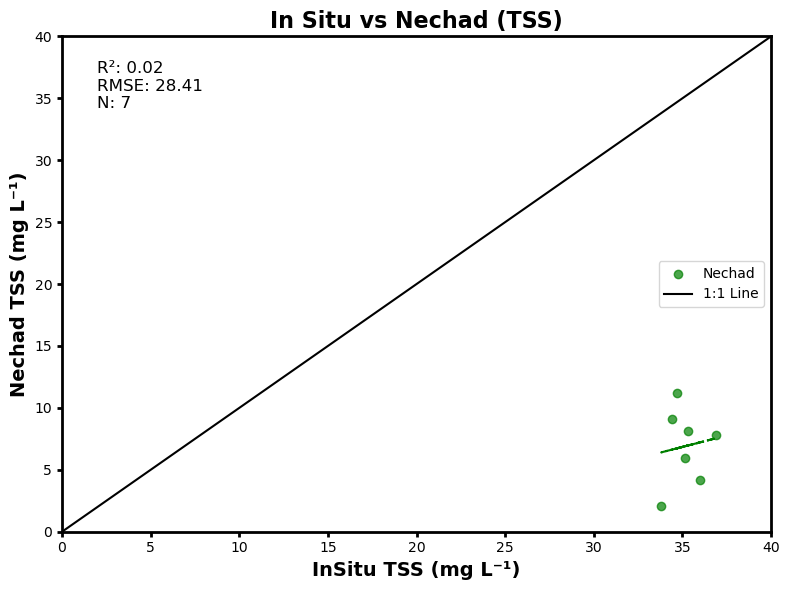

In [22]:



# Remove rows with NaN values in columns 4 and 5 (InSitu, Nechad)
df_clean = df.dropna(subset=['InSitu', 'Nechad'])

# Extract relevant columns
in_situ = df_clean['InSitu']
nechad = df_clean['Nechad']

# Function to calculate R-squared and RMSE
def calculate_metrics(y_true, y_pred):
    r2 = linregress(y_true, y_pred).rvalue ** 2
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for Nechad vs InSitu
ax.scatter(in_situ, nechad, color='green', marker='o', label='Nechad', alpha=0.7)

# Regression line for Nechad
slope_nechad, intercept_nechad = np.polyfit(in_situ, nechad, 1)
ax.plot(in_situ, slope_nechad * in_situ + intercept_nechad, color='green', linestyle='--')

# Plot the 1:1 line
ax.plot([0, 40], [0, 40], color='black', linestyle='-', label='1:1 Line')

# Calculate R² and RMSE for Nechad
r2_nechad, rmse_nechad = calculate_metrics(in_situ, nechad)

# Add R², RMSE, and N values on the plot
ax.text(0.05, 0.95, f'R²: {r2_nechad:.2f}\nRMSE: {rmse_nechad:.2f}\nN: {len(in_situ)}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Set axis labels and title
ax.set_xlabel('InSitu TSS (mg L⁻¹)', fontsize=14, weight='bold')
ax.set_ylabel('Nechad TSS (mg L⁻¹)', fontsize=14, weight='bold')
ax.set_title('In Situ vs. Nechad (TSS)', fontsize=16, weight='bold')

# Set fixed axis limits to 0-40
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)

# Set thicker axes and ticks
ax.tick_params(axis='both', width=2)  # Thicker ticks
ax.spines['top'].set_linewidth(2)  # Thicker top border
ax.spines['right'].set_linewidth(2)  # Thicker right border
ax.spines['bottom'].set_linewidth(2)  # Thicker bottom border
ax.spines['left'].set_linewidth(2)  # Thicker left border

# Add a legend
ax.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig('TSS_Insitu_NEchad.png', dpi=300, bbox_inches='tight')
# plt.savefig('RRS_global2.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('RRS_global2.eps', format='eps', bbox_inches='tight')
plt.show()
